In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import math
from sklearn.model_selection import train_test_split
import numpy as np 
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath("../.."))

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor

from vol_predict.models.dl.mlp_predictor import MLPPredictor as Model
from vol_predict.models.baselines.naive_predictor import NaivePredictor as Baseline
from vol_predict.loss.tm_loss import MixtureNormalNLL, MixtureLogNormalNLL, MixtureWeibullNLL, HingeNormalMixtureNLL, MixtureInverseGaussianNLL
from vol_predict.models.mixture.tm_pred2 import TM_N_Predictor,TM_LN_Predictor,TM_IG_Predictor,TM_W_Predictor

from vol_predict.models.baselines.naive_predictor import NaivePredictor as Baseline
from run import initialize_runner, run_backtest
from vol_predict.loss.loss import Loss

from run import initialize_runner, run_backtest

In [8]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.SPX
config.ASSET_UNIVERSE = ("vol",)
model_params = ModelConfig()
model_params.ar_order = 10
model_params.n_epochs = 30
model_params.hidden_size = 64     # even if not used, this must be provided
model_params.n_features = 1080      # total number of feature columns used
model_params.batch_size = 16
model_params.lr = 1e-2
model_params.optimizer = torch.optim.Adam
# Set loss to your custom normal mixture loss (assumes Loss.NORMAL_NLL returns MixtureNormalNLL)
model_params.loss = Loss.TM_N_NLL  
baseline_params = ModelConfig()
baseline_params.n_epochs = 1
feature_processor = OneToOnePreprocessor(exclude_names=["datetime", "vol", "ret"])

runner = initialize_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Train data on 2018-06-05 00:00:00 to 2018-09-30 21:00:00
Num Train Iterations: 2579
Num Features: 1082


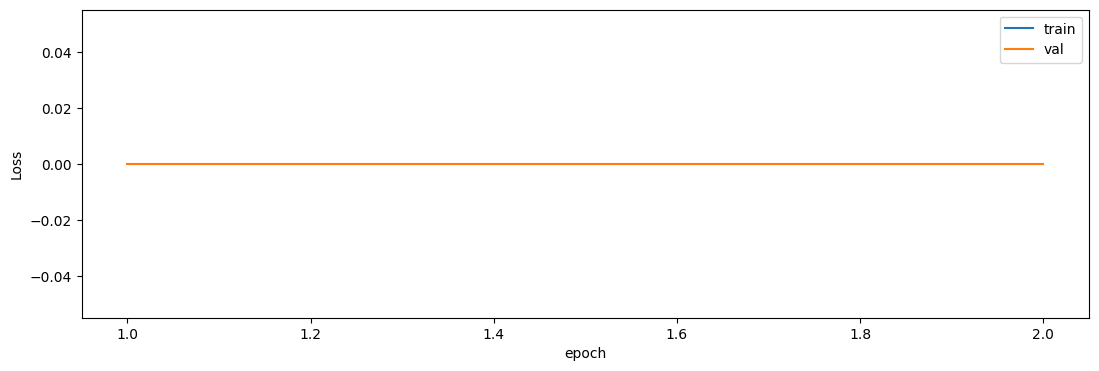

Training 3/30:   0%|          | 0/161 [00:00<?, ?it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:   2%|▏         | 4/161 [00:00<00:04, 32.73it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:   5%|▍         | 8/161 [00:00<00:04, 32.83it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:   7%|▋         | 12/161 [00:00<00:04, 33.37it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  10%|▉         | 16/161 [00:00<00:04, 33.63it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  12%|█▏        | 20/161 [00:00<00:04, 33.86it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  15%|█▍        | 24/161 [00:00<00:04, 33.88it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  17%|█▋        | 28/161 [00:00<00:03, 34.18it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  20%|█▉        | 32/161 [00:00<00:03, 34.25it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  22%|██▏       | 36/161 [00:01<00:03, 33.98it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  25%|██▍       | 40/161 [00:01<00:03, 33.99it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  27%|██▋       | 44/161 [00:01<00:03, 34.14it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  30%|██▉       | 48/161 [00:01<00:03, 34.04it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  32%|███▏      | 52/161 [00:01<00:03, 33.91it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  35%|███▍      | 56/161 [00:01<00:03, 33.95it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  37%|███▋      | 60/161 [00:01<00:02, 34.25it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  40%|███▉      | 64/161 [00:01<00:02, 34.32it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  42%|████▏     | 68/161 [00:01<00:02, 34.43it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  45%|████▍     | 72/161 [00:02<00:02, 34.51it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  47%|████▋     | 76/161 [00:02<00:02, 34.71it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  50%|████▉     | 80/161 [00:02<00:02, 34.77it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  52%|█████▏    | 84/161 [00:02<00:02, 35.09it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  55%|█████▍    | 88/161 [00:02<00:02, 35.06it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  57%|█████▋    | 92/161 [00:02<00:01, 35.07it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  60%|█████▉    | 96/161 [00:02<00:01, 34.79it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  62%|██████▏   | 100/161 [00:02<00:01, 34.95it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  65%|██████▍   | 104/161 [00:03<00:01, 34.85it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  67%|██████▋   | 108/161 [00:03<00:01, 34.64it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  70%|██████▉   | 112/161 [00:03<00:01, 34.68it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  72%|███████▏  | 116/161 [00:03<00:01, 34.76it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  75%|███████▍  | 120/161 [00:03<00:01, 34.79it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  77%|███████▋  | 124/161 [00:03<00:01, 34.72it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  80%|███████▉  | 128/161 [00:03<00:00, 34.36it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  82%|████████▏ | 132/161 [00:03<00:00, 34.15it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  84%|████████▍ | 136/161 [00:03<00:00, 33.88it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  87%|████████▋ | 140/161 [00:04<00:00, 34.06it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

Training 3/30:  91%|█████████ | 146/161 [00:04<00:00, 34.18it/s]

{'ar_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<SqueezeBackward1>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'feat_params': {'mean': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<AddBackward0>), 'sigma': tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='mps:0', grad_fn=<ExpBackward0>)}, 'gate_weights': tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]], device='mps:0', grad_fn=<SoftmaxBackward0>),

KeyboardInterrupt: 

In [9]:
model = TM_N_Predictor(ar_order=10, n=9, lb=120)
baseline = Baseline() 

run_result = runner(model=model, baseline=baseline)

In [ ]:
result = run_backtest(
    model_cls=TM_N_Predictor,       
    baseline_cls=Baseline,
    model_config=model_params,
    baseline_config=baseline_params,
    runner=runner,
)

TypeError: TM_N_Predictor.__init__() got an unexpected keyword argument 'lr'

In [ ]:
model.A_mean


Parameter containing:
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], device='mps:0',
       requires_grad=True)